In [1]:
import e_utils
import e_networks
import e_ensemble
import Ensemble1
import Ensemble2
import Ensemble3
from e_plot_utils import plot_summary

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, WeightedRandomSampler
from torchensemble import VotingClassifier

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
train_set = datasets.ImageFolder(root=e_utils.dirs['train'], transform=e_utils.transform['train'])
val_set = datasets.ImageFolder(root=e_utils.dirs['val'], transform=e_utils.transform['eval'])

In [3]:
class_freq = torch.as_tensor(train_set.targets).bincount()
weight = 1 / class_freq
samples_weight = weight[train_set.targets]
sampler = WeightedRandomSampler(samples_weight, len(samples_weight), replacement=True)

train_dl = DataLoader(train_set, batch_size=10, sampler=sampler, num_workers=2, worker_init_fn=e_utils.wif)
valid_dl = DataLoader(val_set, batch_size=20)

In [4]:
epochs = 15
criterion = nn.CrossEntropyLoss()

In [5]:
modelA=torchvision.models.alexnet(pretrained=False).to(device)
modelB=torchvision.models.efficientnet_b0(pretrained=False).to(device)
modelC=torchvision.models.resnet18(pretrained=False).to(device)



modelA.fc = torch.nn.Linear(in_features=4096, out_features=4)
modelB.fc = torch.nn.Linear(in_features=2048, out_features=4)
modelC.fc = torch.nn.Linear(in_features=512, out_features=4)

modelA.load_state_dict(torch.load('models/lr3e-5_alexnet_cuda.pth', map_location=device))
modelB.load_state_dict(torch.load('models/lr3e-5_efficientnet_cuda.pth', map_location=device))
modelC.load_state_dict(torch.load('models/lr3e-5_resnet_cuda.pth', map_location=device))


ensemble = Ensemble1.EnsembleModel(modelA,modelB,modelC)
for param in torchvision.models.alexnet(pretrained=True).parameters():
    param.requires_grad = False

for param in torchvision.models.resnet18(pretrained=True).parameters():
    param.requires_grad = False   

for param in torchvision.models.efficientnet_b0(pretrained=True).parameters():
    param.requires_grad = False   
    
ensemble= ensemble.to(device)
ensemble.cuda()


C:\Users\Abhijith\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Abhijith\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
C:\Users\Abhijith\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\Abhijith\anaconda3\lib\site-packages\torchvision\models\_utils.

In [6]:
e_utils.fit(
    epochs=epochs,
    model=ensemble,
    name=None,
    criterion=criterion,
    optimizer=optim.Adam(ensemble.parameters(), lr=3e-5),
    train_dl=train_dl,
    valid_dl=valid_dl
)

Epoch [ 1/15]: 100%|██████████████████████████████████████| 4693/4693 [38:41<00:00,  2.02it/s, acc=0.967, loss=0.00446]



		Avg train loss: 0.130044	Avg valid loss: 0.109946

		valid_loss decreased (inf -> 0.109946)
		saving model...



Epoch [ 2/15]: 100%|██████████████████████████████████████| 4693/4693 [38:35<00:00,  2.03it/s, acc=0.989, loss=0.00141]



		Avg train loss: 0.034558	Avg valid loss: 0.094538

		valid_loss decreased (0.109946 -> 0.094538)
		saving model...



Epoch [ 3/15]: 100%|███████████████████████████████████████| 4693/4693 [38:43<00:00,  2.02it/s, acc=0.991, loss=0.0125]



		Avg train loss: 0.026243	Avg valid loss: 0.082141

		valid_loss decreased (0.094538 -> 0.082141)
		saving model...



Epoch [ 4/15]: 100%|██████████████████████████████████████| 4693/4693 [38:40<00:00,  2.02it/s, acc=0.992, loss=7.13e-5]



		Avg train loss: 0.023649	Avg valid loss: 0.110953



Epoch [ 5/15]: 100%|███████████████████████████████████████| 4693/4693 [38:18<00:00,  2.04it/s, acc=0.993, loss=0.0017]



		Avg train loss: 0.020053	Avg valid loss: 0.091332



Epoch [ 6/15]: 100%|███████████████████████████████████████| 4693/4693 [38:24<00:00,  2.04it/s, acc=0.993, loss=0.0112]



		Avg train loss: 0.019187	Avg valid loss: 0.108610



Epoch [ 7/15]: 100%|██████████████████████████████████████| 4693/4693 [38:34<00:00,  2.03it/s, acc=0.994, loss=0.00144]



		Avg train loss: 0.017712	Avg valid loss: 0.100468



Epoch [ 8/15]: 100%|█████████████████████████████████████| 4693/4693 [38:56<00:00,  2.01it/s, acc=0.995, loss=0.000255]



		Avg train loss: 0.016018	Avg valid loss: 0.079114

		valid_loss decreased (0.082141 -> 0.079114)
		saving model...



Epoch [ 9/15]: 100%|██████████████████████████████████████| 4693/4693 [39:13<00:00,  1.99it/s, acc=0.996, loss=0.00103]



		Avg train loss: 0.013532	Avg valid loss: 0.088604



Epoch [10/15]: 100%|█████████████████████████████████████| 4693/4693 [39:18<00:00,  1.99it/s, acc=0.996, loss=0.000104]



		Avg train loss: 0.013150	Avg valid loss: 0.099659



Epoch [11/15]: 100%|██████████████████████████████████████| 4693/4693 [39:18<00:00,  1.99it/s, acc=0.995, loss=0.00245]



		Avg train loss: 0.014303	Avg valid loss: 0.090624



Epoch [12/15]: 100%|█████████████████████████████████████| 4693/4693 [39:20<00:00,  1.99it/s, acc=0.996, loss=0.000155]



		Avg train loss: 0.012367	Avg valid loss: 0.071616

		valid_loss decreased (0.079114 -> 0.071616)
		saving model...



Epoch [13/15]: 100%|███████████████████████████████████████| 4693/4693 [39:21<00:00,  1.99it/s, acc=0.996, loss=3.6e-5]



		Avg train loss: 0.012311	Avg valid loss: 0.090411



Epoch [14/15]: 100%|█████████████████████████████████████| 4693/4693 [39:18<00:00,  1.99it/s, acc=0.996, loss=0.000155]



		Avg train loss: 0.011837	Avg valid loss: 0.074868



Epoch [15/15]: 100%|█████████████████████████████████████| 4693/4693 [39:19<00:00,  1.99it/s, acc=0.997, loss=0.000294]



		Avg train loss: 0.009721	Avg valid loss: 0.122033



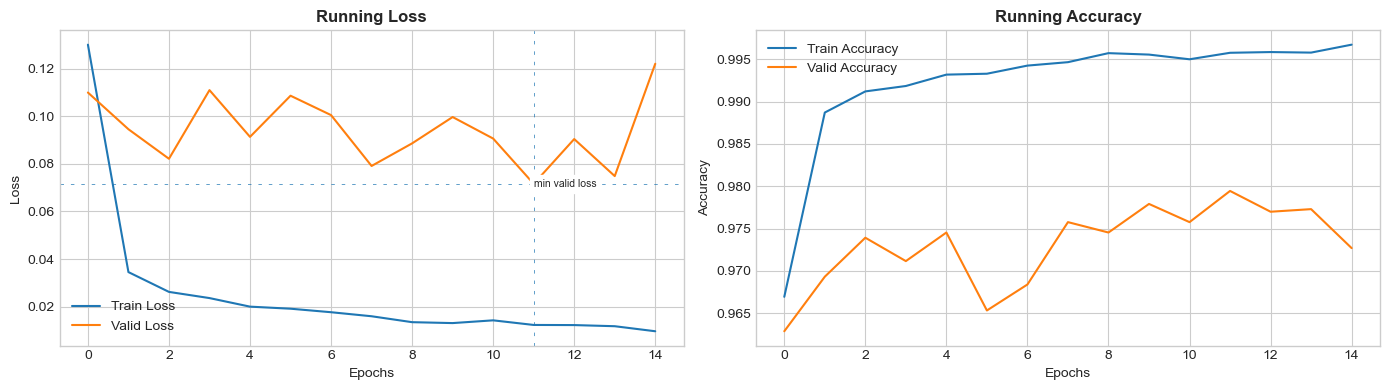

In [13]:
plot_summary('outputs/CSVs/e_ensemblemodel.csv')

In [6]:
modelA=torchvision.models.mobilenet_v2(pretrained=False).to(device)
modelB=torchvision.models.squeezenet1_1(pretrained=False).to(device)
modelC=torchvision.models.shufflenet_v2_x1_0(pretrained=False).to(device)



modelA.fc = torch.nn.Linear(in_features=2048, out_features=4)
modelB.fc = torch.nn.Linear(in_features=2048, out_features=4)
modelC.fc = torch.nn.Linear(in_features=1024, out_features=4)

modelA.load_state_dict(torch.load('models/lr3e-5_mobilenetv2_cuda.pth', map_location=device))
modelB.load_state_dict(torch.load('models/lr3e-5_squeezenet_cuda.pth', map_location=device))
modelC.load_state_dict(torch.load('models/lr3e-5_shufflenetv2_cuda.pth', map_location=device))


ensemble2 = Ensemble2.Ensemble2(modelA,modelB,modelC)
for param in torchvision.models.mobilenet_v2(pretrained=True).parameters():
    param.requires_grad = False

for param in torchvision.models.squeezenet1_1(pretrained=True).parameters():
    param.requires_grad = False   

for param in torchvision.models.shufflenet_v2_x1_0(pretrained=True).parameters():
    param.requires_grad = False   
    
ensemble2= ensemble2.to(device)
ensemble2.cuda()

C:\Users\Abhijith\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\Abhijith\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SqueezeNet1_1_Weights.IMAGENET1K_V1`. You can also use `weights=SqueezeNet1_1_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\Abhijith\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecat

Ensemble2(
  (modelA): MobileNetV2(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU6(inplace=True)
          )
          (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (2): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 96, kernel_size=(1, 1

In [7]:
e_utils.fit(
    epochs=epochs,
    model=ensemble2,
    name=None,
    criterion=criterion,
    optimizer=optim.Adam(ensemble2.parameters(), lr=3e-5),
    train_dl=train_dl,
    valid_dl=valid_dl
)

Epoch [ 1/15]: 100%|██████████████████████████████████████| 4693/4693 [27:02<00:00,  2.89it/s, acc=0.957, loss=0.00219]



		Avg train loss: 0.135232	Avg valid loss: 0.125743

		valid_loss decreased (inf -> 0.125743)
		saving model...



Epoch [ 2/15]: 100%|██████████████████████████████████████| 4693/4693 [27:11<00:00,  2.88it/s, acc=0.986, loss=0.00568]



		Avg train loss: 0.044898	Avg valid loss: 0.147451



Epoch [ 3/15]: 100%|██████████████████████████████████████| 4693/4693 [27:11<00:00,  2.88it/s, acc=0.988, loss=0.00317]



		Avg train loss: 0.034171	Avg valid loss: 0.114245

		valid_loss decreased (0.125743 -> 0.114245)
		saving model...



Epoch [ 4/15]: 100%|███████████████████████████████████████| 4693/4693 [27:39<00:00,  2.83it/s, acc=0.991, loss=0.0122]



		Avg train loss: 0.026985	Avg valid loss: 0.103287

		valid_loss decreased (0.114245 -> 0.103287)
		saving model...



Epoch [ 5/15]: 100%|███████████████████████████████████████| 4693/4693 [27:48<00:00,  2.81it/s, acc=0.992, loss=0.0105]



		Avg train loss: 0.024143	Avg valid loss: 0.085265

		valid_loss decreased (0.103287 -> 0.085265)
		saving model...



Epoch [ 6/15]: 100%|████████████████████████████████████████| 4693/4693 [28:21<00:00,  2.76it/s, acc=0.992, loss=0.113]



		Avg train loss: 0.022538	Avg valid loss: 0.095291



Epoch [ 7/15]: 100%|███████████████████████████████████████| 4693/4693 [29:51<00:00,  2.62it/s, acc=0.994, loss=0.0503]



		Avg train loss: 0.020473	Avg valid loss: 0.088021



Epoch [ 8/15]: 100%|███████████████████████████████████████| 4693/4693 [28:00<00:00,  2.79it/s, acc=0.993, loss=0.0259]



		Avg train loss: 0.019972	Avg valid loss: 0.082040

		valid_loss decreased (0.085265 -> 0.082040)
		saving model...



Epoch [ 9/15]: 100%|██████████████████████████████████████| 4693/4693 [27:15<00:00,  2.87it/s, acc=0.994, loss=0.00351]



		Avg train loss: 0.016940	Avg valid loss: 0.097295



Epoch [10/15]: 100%|██████████████████████████████████████| 4693/4693 [27:15<00:00,  2.87it/s, acc=0.995, loss=7.26e-5]



		Avg train loss: 0.015432	Avg valid loss: 0.143869



Epoch [11/15]: 100%|██████████████████████████████████████| 4693/4693 [27:15<00:00,  2.87it/s, acc=0.995, loss=0.00432]



		Avg train loss: 0.015506	Avg valid loss: 0.087413



Epoch [12/15]: 100%|██████████████████████████████████████| 4693/4693 [27:14<00:00,  2.87it/s, acc=0.996, loss=0.00383]



		Avg train loss: 0.012492	Avg valid loss: 0.144492



Epoch [13/15]: 100%|███████████████████████████████████████| 4693/4693 [27:17<00:00,  2.87it/s, acc=0.996, loss=0.0094]



		Avg train loss: 0.013525	Avg valid loss: 0.110725



Epoch [14/15]: 100%|███████████████████████████████████████| 4693/4693 [27:11<00:00,  2.88it/s, acc=0.995, loss=0.0014]



		Avg train loss: 0.013956	Avg valid loss: 0.115443



Epoch [15/15]: 100%|█████████████████████████████████████| 4693/4693 [27:13<00:00,  2.87it/s, acc=0.996, loss=0.000937]



		Avg train loss: 0.011679	Avg valid loss: 0.087749



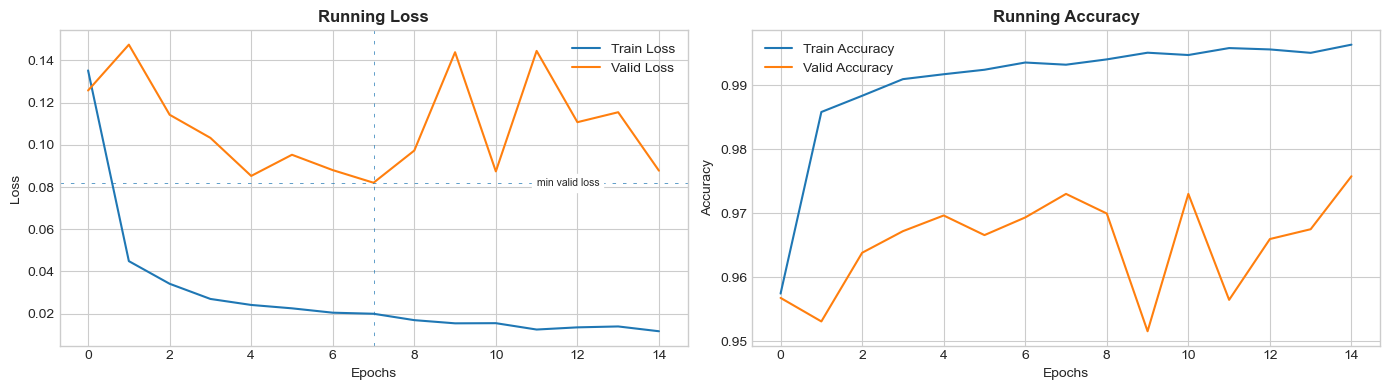

In [12]:
plot_summary('outputs/CSVs/e_ensemble2.csv')

In [5]:
modelA=torchvision.models.alexnet(pretrained=False).to(device)
modelB=torchvision.models.efficientnet_b0(pretrained=False).to(device)
modelC=torchvision.models.resnet18(pretrained=False).to(device)



modelA.fc = torch.nn.Linear(in_features=4096, out_features=4)
modelB.fc = torch.nn.Linear(in_features=2048, out_features=4)
modelC.fc = torch.nn.Linear(in_features=512, out_features=4)

modelA.load_state_dict(torch.load('models/lr3e-5_alexnet_cuda.pth', map_location=device))
modelB.load_state_dict(torch.load('models/lr3e-5_efficientnet_cuda.pth', map_location=device))
modelC.load_state_dict(torch.load('models/lr3e-5_resnet_cuda.pth', map_location=device))


ensemble = Ensemble1.EnsembleModel(modelA,modelB,modelC)

for param in torchvision.models.alexnet(pretrained=True).parameters():
    param.requires_grad = False

for param in torchvision.models.resnet18(pretrained=True).parameters():
    param.requires_grad = False   

for param in torchvision.models.efficientnet_b0(pretrained=True).parameters():
    param.requires_grad = False
    
ensemble=ensemble.to(device)
    
modelD=torchvision.models.mobilenet_v2(pretrained=False).to(device)
modelE=torchvision.models.squeezenet1_1(pretrained=False).to(device)
modelF=torchvision.models.shufflenet_v2_x1_0(pretrained=False).to(device)



modelD.fc = torch.nn.Linear(in_features=2048, out_features=4)
modelE.fc = torch.nn.Linear(in_features=2048, out_features=4)
modelF.fc = torch.nn.Linear(in_features=1024, out_features=4)

modelD.load_state_dict(torch.load('models/lr3e-5_mobilenetv2_cuda.pth', map_location=device))
modelE.load_state_dict(torch.load('models/lr3e-5_squeezenet_cuda.pth', map_location=device))
modelF.load_state_dict(torch.load('models/lr3e-5_shufflenetv2_cuda.pth', map_location=device))


ensemble2 = Ensemble2.Ensemble2(modelD,modelE,modelF)

for param in torchvision.models.mobilenet_v2(pretrained=True).parameters():
    param.requires_grad = False

for param in torchvision.models.squeezenet1_1(pretrained=True).parameters():
    param.requires_grad = False   

for param in torchvision.models.shufflenet_v2_x1_0(pretrained=True).parameters():
    param.requires_grad = False   
    
ensemble2= ensemble2.to(device)

    
ensemble.load_state_dict(torch.load('models/lr3e-5_ensemblemodel_cuda.pth', map_location=device))
ensemble2.load_state_dict(torch.load('models/lr3e-5_ensemble2_cuda.pth', map_location=device))
    
EOE = Ensemble3.EOE(ensemble,ensemble2)

for param in ensemble.parameters():
    param.requires_grad = False

for param in ensemble2.parameters():
    param.requires_grad = False 

EOE= EOE.to(device)
EOE.cuda()

C:\Users\Abhijith\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Abhijith\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
C:\Users\Abhijith\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\Abhijith\anaconda3\lib\site-packages\torchvision\models\_utils.

EOE(
  (modelA): EnsembleModel(
    (modelA): AlexNet(
      (features): Sequential(
        (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
        (1): ReLU(inplace=True)
        (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
        (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
        (4): ReLU(inplace=True)
        (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
        (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (7): ReLU(inplace=True)
        (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (9): ReLU(inplace=True)
        (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (11): ReLU(inplace=True)
        (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      )
      (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
      (classifier): Se

In [10]:
e_utils.fit(
    epochs=epochs,
    model=EOE,
    name=None,
    criterion=criterion,
    optimizer=optim.Adam(EOE.parameters(), lr=3e-2),
    train_dl=train_dl,
    valid_dl=valid_dl
)

Epoch [ 1/15]: 100%|██████████████████████████████████████| 4693/4693 [16:06<00:00,  4.86it/s, acc=0.998, loss=1.19e-7]



		Avg train loss: 0.006327	Avg valid loss: 0.134712

		valid_loss decreased (inf -> 0.134712)
		saving model...



Epoch [ 2/15]: 100%|██████████████████████████████████████| 4693/4693 [16:17<00:00,  4.80it/s, acc=0.998, loss=2.38e-8]



		Avg train loss: 0.005930	Avg valid loss: 0.156163



Epoch [ 3/15]: 100%|██████████████████████████████████████| 4693/4693 [16:19<00:00,  4.79it/s, acc=0.999, loss=1.48e-5]



		Avg train loss: 0.005101	Avg valid loss: 0.187872



Epoch [ 4/15]: 100%|████████████████████████████████████████████| 4693/4693 [16:19<00:00,  4.79it/s, acc=0.999, loss=0]



		Avg train loss: 0.005941	Avg valid loss: 0.170581



Epoch [ 5/15]: 100%|██████████████████████████████████████| 4693/4693 [16:19<00:00,  4.79it/s, acc=0.999, loss=1.66e-6]



		Avg train loss: 0.006012	Avg valid loss: 0.143051



Epoch [ 6/15]: 100%|██████████████████████████████████████| 4693/4693 [16:21<00:00,  4.78it/s, acc=0.998, loss=2.98e-7]



		Avg train loss: 0.007458	Avg valid loss: 0.171874



Epoch [ 7/15]: 100%|██████████████████████████████████████| 4693/4693 [16:22<00:00,  4.78it/s, acc=0.998, loss=0.00872]



		Avg train loss: 0.005963	Avg valid loss: 0.167411



Epoch [ 8/15]: 100%|██████████████████████████████████████| 4693/4693 [16:32<00:00,  4.73it/s, acc=0.998, loss=4.47e-5]



		Avg train loss: 0.007982	Avg valid loss: 0.131270

		valid_loss decreased (0.134712 -> 0.131270)
		saving model...



Epoch [ 9/15]: 100%|██████████████████████████████████████| 4693/4693 [16:41<00:00,  4.69it/s, acc=0.999, loss=1.19e-8]



		Avg train loss: 0.004666	Avg valid loss: 0.159560



Epoch [10/15]: 100%|██████████████████████████████████████| 4693/4693 [16:24<00:00,  4.77it/s, acc=0.998, loss=9.54e-8]



		Avg train loss: 0.006191	Avg valid loss: 0.156353



Epoch [11/15]: 100%|██████████████████████████████████████| 4693/4693 [16:24<00:00,  4.77it/s, acc=0.998, loss=1.55e-5]



		Avg train loss: 0.007417	Avg valid loss: 0.175566



Epoch [12/15]: 100%|██████████████████████████████████████| 4693/4693 [16:23<00:00,  4.77it/s, acc=0.998, loss=5.13e-7]



		Avg train loss: 0.006816	Avg valid loss: 0.132191



Epoch [13/15]: 100%|██████████████████████████████████████| 4693/4693 [16:22<00:00,  4.77it/s, acc=0.999, loss=3.58e-8]



		Avg train loss: 0.005442	Avg valid loss: 0.129143

		valid_loss decreased (0.131270 -> 0.129143)
		saving model...



Epoch [14/15]: 100%|████████████████████████████████████████████| 4693/4693 [16:21<00:00,  4.78it/s, acc=0.998, loss=0]



		Avg train loss: 0.006875	Avg valid loss: 0.164572



Epoch [15/15]: 100%|███████████████████████████████████████| 4693/4693 [16:22<00:00,  4.78it/s, acc=0.998, loss=2.5e-7]



		Avg train loss: 0.007706	Avg valid loss: 0.143257



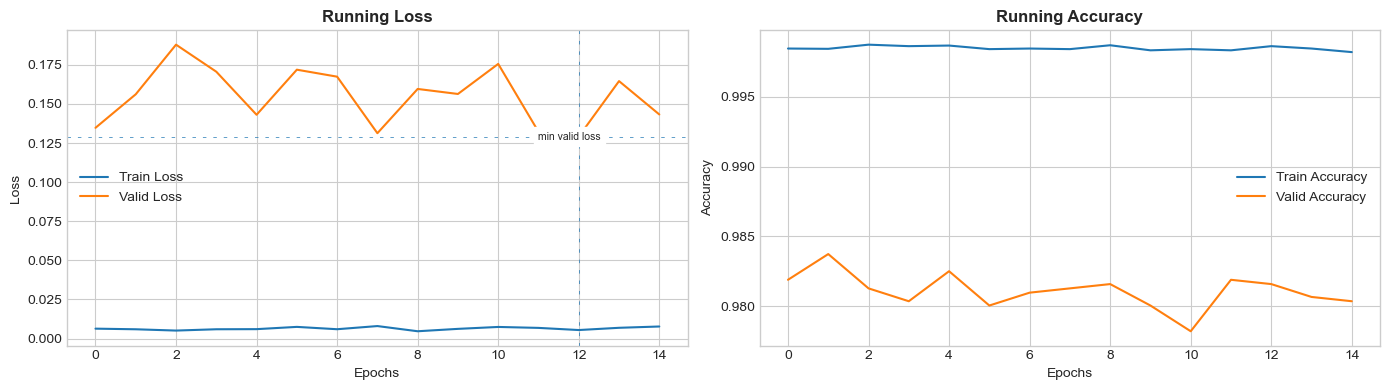

In [11]:
plot_summary('outputs/CSVs/e_eoe.csv')